## 1. Difference between AI, ML, DL, and Data Science
**AI (Artificial Intelligence):** Broad field for machines that act like humans.  
**ML (Machine Learning):** Subset of AI where models learn from data.  
**DL (Deep Learning):** Subset of ML using deep neural networks.  
**Data Science:** Uses data cleaning, analysis, visualization, and ML to get insights.

## 2. Overfitting and Underfitting
**Overfitting:** Model learns noise, performs well on train but poorly on test.  
**Underfitting:** Model too simple, performs poorly on both train and test.  
**Prevention:** cross-validation, regularization, more data, simpler/complex models as needed.

## 3. Handling missing values (3 methods)
**Deletion:** Remove rows with missing values (works if few).  
**Mean/Median Imputation:** Replace missing numeric values with mean/median.  
**Predictive Modeling:** Use a model to predict missing values (advanced).

## 4. Imbalanced dataset and handling techniques
**Imbalanced dataset:** One class much larger than another (e.g., fraud).  
**Techniques:** SMOTE (synthetic oversampling), Random over/under sampling, class weights in model.

## 5. Feature scaling importance and comparison
**Why scale:** Many algorithms depend on feature scale (KNN, SVM); gradient descent converges faster.  
**Min-Max:** Scales to 0-1, sensitive to outliers.  
**Standardization:** Mean 0 and std 1, better with outliers.

## 6. Label Encoding vs One-Hot Encoding
**Label Encoding:** Maps categories to integers (use for ordinal).  
**One-Hot Encoding:** Creates binary columns per category (use for nominal).

## 7: Analyze relationship between app categories and ratings

Top categories by average rating (top 10):
Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
Name: Rating, dtype: float64


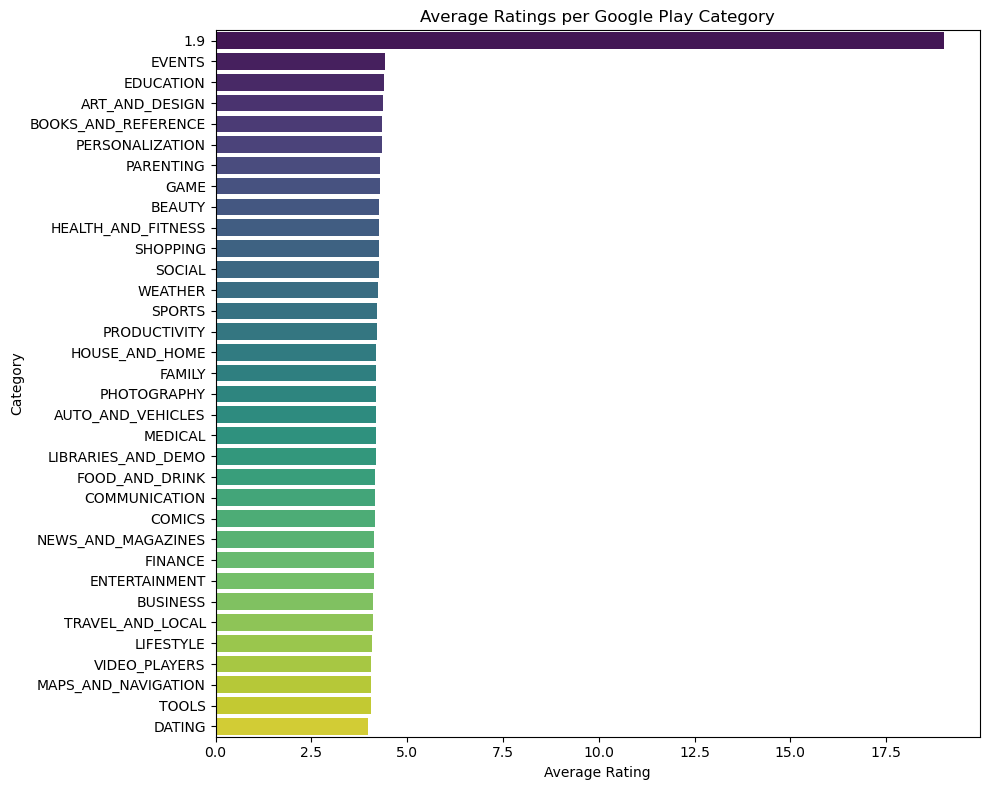

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset 
df = pd.read_csv(r'C:\Users\karka\Desktop\PW\Python Files\ML & EDA\01_googleplaystore.CSV')

# Ensure Rating numeric and clean
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df_clean = df.dropna(subset=['Rating'])

# Compute average rating per category
category_ratings = df_clean.groupby('Category')['Rating'].mean().sort_values(ascending=False)

print("Top categories by average rating (top 10):")
print(category_ratings.head(10))

# Plot
plt.figure(figsize=(10,8))
sns.barplot(x=category_ratings.values, y=category_ratings.index, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Average Ratings per Google Play Category')
plt.tight_layout()
plt.show()


## 8: Titanic Dataset analysis


Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


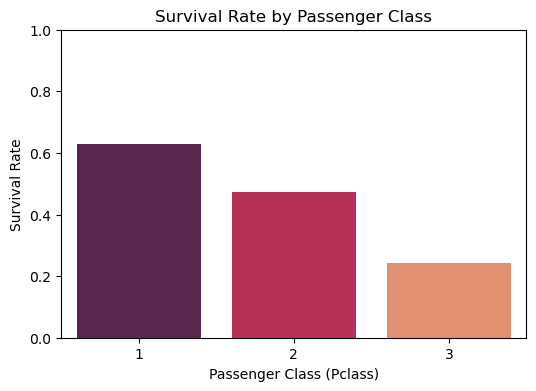


Survival rate by Age Group:
AgeGroup
Adult    0.361183
Child    0.539823
Name: Survived, dtype: float64


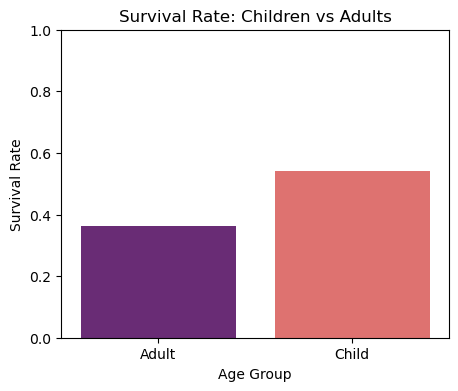

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset
df = pd.read_csv(r'C:\Users\karka\Desktop\PW\Python Files\ML & EDA\02_titanic.CSV')

# Survival rate by Pclass
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("Survival rate by Pclass:")
print(survival_by_class)

plt.figure(figsize=(6,4))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='rocket')
plt.ylim(0,1)
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

# Age groups: Child < 18, Adult >= 18
df['AgeGroup'] = df['Age'].apply(lambda x: 'Child' if pd.notnull(x) and x < 18 else 'Adult')
survival_by_agegroup = df.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival rate by Age Group:")
print(survival_by_agegroup)

plt.figure(figsize=(5,4))
sns.barplot(x=survival_by_agegroup.index, y=survival_by_agegroup.values, palette='magma')
plt.ylim(0,1)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate: Children vs Adults')
plt.show()
